This notebook takes all (perpendicular) baseline data out of baseline files and puts it into its own file. <br><br>

Written on 5-23-23.
***

In [1]:
# import stuff
import os,sys
import glob
import pandas
from osgeo import gdal
import datetime 
from datetime import datetime
from datetime import timedelta
from dateutil import parser
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches
# from matplotlib.patches import Rectangle
# from scipy.interpolate import NearestNDInterpolator, LinearNDInterpolator
%matplotlib  widget

Load in dates for grabbing each baseline file. 

In [2]:
datesDir = '/data/ocp4/LagunaSalada/Data_and_Figs/cropped_9000_1800_18000_3600/'

# load in dates, make sure they are in order
dates = [os.path.basename(x) for x in glob.glob(datesDir+"SLC_vh/2*")]; dates = sorted(dates)
nd = len(dates); numIgrams = nd-1

# dates is a list of strings, convert strings to datetime objects 
slc_dates=[]
for i in range(0,len(dates)):
    slc_dates.append(datetime.strptime(str(dates[i]).replace('\n',''), '%Y%m%d'))
igram_dates = slc_dates[1::]

Load in baseline file, look for the line I want, extract the data, print it out and save to an array.

In [3]:
baselinesDir = '/data/ocp4/LagunaSalada/Data_and_Figs/1_igrams/baselines/'
IW1_baselines = np.ndarray((nd,),dtype='float')
IW2_baselines = np.ndarray((nd,),dtype='float')

for i in range(nd): #range(numIgrams)
    BLfile = dates[0]+'_'+dates[i]+'/'+dates[0]+'_'+dates[i]+'.txt'
    #print(baselinesDir+BLfile)
    # open the file 
    f = open(baselinesDir+BLfile, 'r')
    g = f.readlines()
    # extract only the lines we need (Bperp)
    IW1, IW2 = g[1], g[4]
    #print(IW1,IW2)
    IW1_num, IW2_num = IW1[17::], IW2[17::]
    IW1_baselines[i], IW2_baselines[i] = float(IW1_num), float(IW2_num)
    #print(IW1_baselines[i], IW2_baselines[i])
    print('i: '+str(i)+'\t'+str(dates[0])+'-'+str(dates[i])+'\tIW1: '+str(IW1_baselines[i])+'\t\t IW2: '+str(IW2_baselines[i]))

i: 0	20170510-20170510	IW1: nan		 IW2: nan
i: 1	20170510-20170522	IW1: 51.061208494421415		 IW2: 49.385568464985354
i: 2	20170510-20170603	IW1: 106.28723255739968		 IW2: 100.43555505899712
i: 3	20170510-20170615	IW1: 131.7535254418804		 IW2: 125.41934741119807
i: 4	20170510-20170627	IW1: 83.70683192510089		 IW2: 79.74110731539567
i: 5	20170510-20170709	IW1: 74.75737176464791		 IW2: 72.05849318452934
i: 6	20170510-20170721	IW1: 101.14209934016338		 IW2: 95.72776442144098
i: 7	20170510-20170802	IW1: 63.05219327987915		 IW2: 60.065706044760134
i: 8	20170510-20170814	IW1: 104.36809528811843		 IW2: 99.85336095585164
i: 9	20170510-20170826	IW1: 72.94797507687373		 IW2: 68.25289892505883
i: 10	20170510-20170907	IW1: 66.16295823878835		 IW2: 61.64270411309303
i: 11	20170510-20170919	IW1: 25.0113792106164		 IW2: 22.491840464270503
i: 12	20170510-20171013	IW1: 94.86974607040153		 IW2: 88.13109205080188
i: 13	20170510-20171025	IW1: 53.345107026138976		 IW2: 48.69977424782028
i: 14	20170510-201711

Calculate baselines for sequential pairs by differencing baselines (currently all from first date.)

In [4]:
IW1_baselines[0] = 0; IW2_baselines[0] = 0
IW1_diff, IW2_diff = np.diff(IW1_baselines), np.diff(IW2_baselines)
# append a zero to the first one? 

In [5]:
start_indices = [0,47,108,147,0,0,107]
end_indices = [46,107,146,numIgrams,88,numIgrams,153]
num_intervals = len(start_indices)

for i in range(num_intervals):
    print('interval '+str(i)+': '+str(dates[start_indices[i]]+' - '+str(dates[end_indices[i]])))
print('\ntotal duration of this study: '+str((igram_dates[-1]-igram_dates[0]).days/365.25)+' years')

colors_to_use = ['gold','hotpink','olive','coral','cornflowerblue','gray','burlywood']

interval 0: 20170510 - 20181125
interval 1: 20181207 - 20200412
interval 2: 20200418 - 20201208
interval 3: 20201214 - 20220108
interval 4: 20170510 - 20191220
interval 5: 20170510 - 20220108
interval 6: 20200412 - 20210119

total duration of this study: 4.632443531827516 years


Now plot the baselines over time.

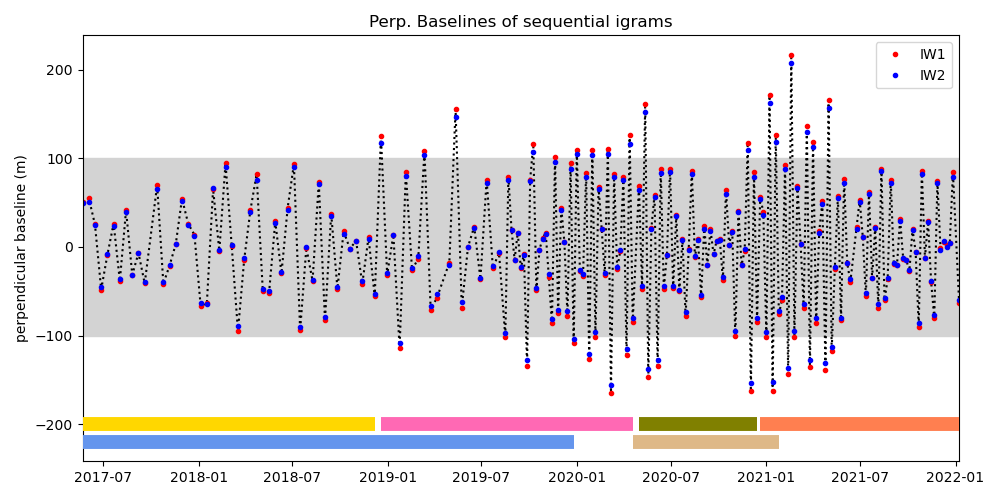

In [24]:
plt.figure(figsize=(10,5),tight_layout=True)
plt.fill_between([igram_dates[0],igram_dates[-1]],-100,100,color='lightgray')
plt.plot(igram_dates,IW1_diff,'k:')
plt.plot(igram_dates,IW1_diff,'r.',label='IW1')
plt.plot(igram_dates,IW2_diff,'b.',label='IW2')
plt.ylabel('perpendicular baseline (m)')
plt.xlim([igram_dates[0],igram_dates[-1]])

yval = -200.0
linewid = 10.0
plt.hlines(yval,igram_dates[0],igram_dates[46],color='gold',linewidth=linewid,zorder=10)
plt.hlines(yval,igram_dates[47],igram_dates[107],color='hotpink',linewidth=linewid,zorder=10)
plt.hlines(yval,igram_dates[108],igram_dates[146],color='olive',linewidth=linewid,zorder=10)
plt.hlines(yval,igram_dates[147],igram_dates[-1],color='coral',linewidth=linewid,zorder=10)
plt.hlines(yval-20.0,igram_dates[0],igram_dates[88],color='cornflowerblue',linewidth=linewid,zorder=10)
plt.hlines(yval-20.0,igram_dates[107],igram_dates[153],color='burlywood',linewidth=linewid,zorder=10)

plt.legend(); plt.title('Perp. Baselines of sequential igrams')
plt.show()

Which igram has the largest baseline? Find dates and index.

In [7]:
max_BL_index = np.argmax(np.abs(IW1_diff))
BL_max = IW1_diff[max_BL_index]
print('Largest baseline: '+str(BL_max))
print(dates[max_BL_index-1]+'-'+dates[max_BL_index])

Largest baseline: 216.98341563693378
20210206-20210212


Which igrams have abs(baselines) > 100 m? 

In [38]:
large_BL_indices = np.where(np.abs(IW1_diff) > 100.0)[0]
large_BLs = IW1_diff[large_BL_indices]
large_BL_dates = []
for i in range(len(large_BL_indices)):
    large_BL_dates.append(igram_dates[large_BL_indices[i]]) 
print('igrams with large baselines: ')
print(large_BL_indices)

igrams with large baselines: 
[ 47  50  54  58  66  73  75  82  88  89  93  94  95  99 100 105 106 110
 111 114 139 143 144 149 150 151 152 156 157 158 162 163 164 168 169 170]


These are the igrams that have issues in terms of small spatial unwrapping errors based on phase triplets not adding to zero:

10-20 had a few issues, 69,70,72-73,110-111,152-153,181-184,190-191 have small spatial issues

Plot this igram and see if it's poorly unwrapped. 

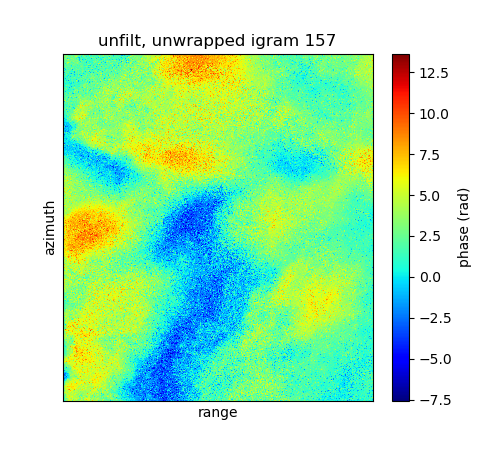

In [8]:
driver=gdal.GetDriverByName('ISCE')

# igramsDir is where the cropped, unwrapped igrams are
igramsDir = '/data/ocp4/LagunaSalada/Data_and_Figs/cropped_9000_1800_18000_3600/cropped_LS_with_western_mtns/unfilt_unwrapped/'
# larger cropped area with western mountains 
dx = 4000
dy = 1100

i = max_BL_index
igramFile = igramsDir+dates[i-1]+'_'+dates[i]+'_unfilt.unw'
ds = gdal.Open(igramFile,gdal.GA_ReadOnly)
temp_igram = ds.GetRasterBand(1).ReadAsArray(0,0,dx,dy)

# plot it 
plt.figure(figsize=(5,4.5))
plt.imshow(temp_igram, cmap='jet',aspect='auto',interpolation='nearest'); 
plt.xlim(dx,0); plt.xticks([]); plt.yticks([])
plt.xlabel('range'); plt.ylabel('azimuth'); plt.title('unfilt, unwrapped igram '+str(i)) 
plt.colorbar(label='phase (rad)'); plt.show()

What do skip1 baselines look like? 